<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Teste_Bartlett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import math
import scipy

In [2]:
def treat_values(values):
    values = [round(x, ndigits=1) for x in values]
    values = np.array(values)
    return values

In [3]:
# k = número de amostras
# n = quantidade de valores na amostra

def criaTabela(k, n):
  tabela = pd.DataFrame(columns=[f"col_{i}" for i in range(1, k+1)])

  #population = range(1, 100)
  for i in range(1, k+1):
    tabela[f'col_{i}'] = treat_values(np.random.normal(loc=800, scale=100, size=n))

  return tabela

In [4]:
tabela1 = criaTabela(3, 14)
print(tabela1)

     col_1  col_2   col_3
0    741.7  666.5   961.7
1    743.7  827.7   684.7
2    738.5  846.5   980.0
3    809.8  753.2   796.6
4    844.9  728.2   667.1
5    862.2  904.1  1055.8
6   1015.4  691.3   868.0
7    756.0  984.9   800.0
8    746.8  945.8   823.7
9    770.1  840.4   790.9
10   675.6  656.1   506.1
11   744.7  668.9   855.3
12   858.8  800.4   823.1
13   820.0  943.7   826.3


In [5]:
n = len(tabela1)
k = len(tabela1.columns)
N = n*k
print(n, k, N)

14 3 42


In [6]:
var = []
for i in range(1, len(tabela1.columns)+1):
  var.append(np.var(tabela1[f'col_{i}']))

print(var)

[6457.984897959183, 11866.717397959184, 17627.669234693873]


In [7]:
dp = []
for i in range(1, len(tabela1.columns)+1):
  dp.append(np.std(tabela1[f'col_{i}']))

print(dp)

[80.36158844845704, 108.9344637750569, 132.7692330123733]


In [8]:
sum(var)

35952.37153061224

varianciap = $S^2p$

In [9]:
varianciap = ((n-1)*(sum(var))) / N-k
print(varianciap)

11125.114997570456


In [10]:
logvarianciap = math.log(varianciap)

logs = []

for i in range(k):
  logs.append(math.log(var[i]))

print(logs)
print(logvarianciap)

[8.773072612814277, 9.381492903271793, 9.777225062153768]
9.316960443841282


In [11]:
q = ((N-k) * logvarianciap) - ((n-1) * (sum(logs)))
print(q)

0.24817979269215584


In [12]:
(N-k) * logvarianciap

363.36145730981

In [13]:
(n-1) * (sum(logs))

363.11327751711787

In [14]:
c = 1 + (1 / (3 * (k - 1))) * ((k / (n - 1)) - (1 / ((n*k)-k)))
print(c)

1.0341880341880343


In [15]:
b = q / c
b

0.23997550202464654

In [16]:
# GRAU DE LIBERDADE: 2

Bcalc = scipy.stats.chi2.cdf(b, df=(k-1)) # valor seguindo a distribuição qui-quadrado
print(Bcalc)

0.11306869933880685


In [17]:
Xc1 = q / (1+c)
Xc1

0.12200435186967326

In [ ]:
# GRAU DE LIBERDADE: 2

pvalor = scipy.stats.chi2.cdf(Xc1, df=(k-1)) # valor seguindo a distribuição qui-quadrado
pvalor = 1 - pvalor
print(pvalor)

0.34857787017517483


In [ ]:
# https://www.geeksforgeeks.org/how-to-perform-bartletts-test-in-python/

scipy.stats.bartlett(tabela1['col_1'], tabela1['col_2'], tabela1['col_3'])

BartlettResult(statistic=6.950965312823319, pvalue=0.03094689350137647)

In [ ]:
# p = k-1 (grau de liberdade)

def bartlett_critico(p):
  if p <= 20:
    X2c = [0, 3.841, 5.991, 7.815, 9.488, 11.071, 12.592, 14.067, 15.507, 16.919, 18.307,
          19.675, 21.026, 22.362, 23.685, 24.996, 26.296, 27.587, 28.869, 30.144, 31.410]
    b_critico = X2c[p]
  else:
    pass

  return b_critico

In [ ]:
b_critico = bartlett_critico(k-1)

In [ ]:
if Bcalc > b_critico:
  print("Com 95% de confiança, rejeitamos H0")
else:
  print("Com 95% de confiança, aceitamos H0")

Com 95% de confiança, aceitamos H0


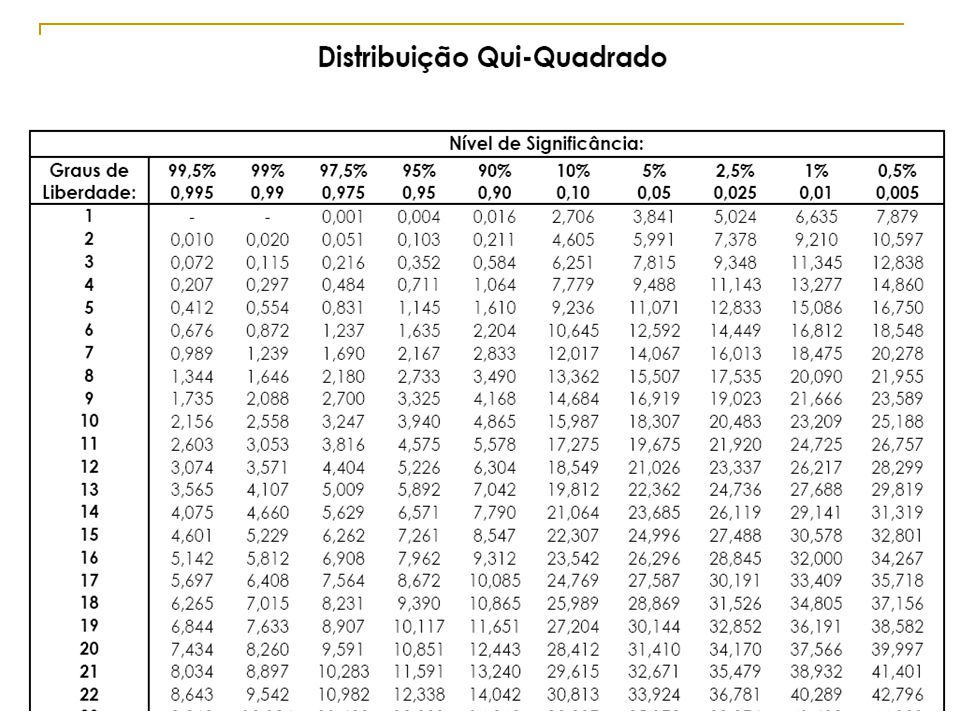

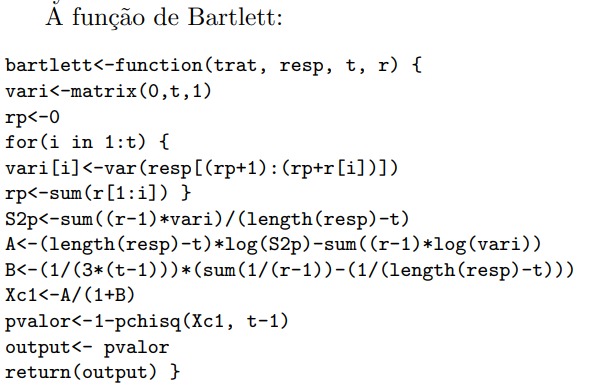

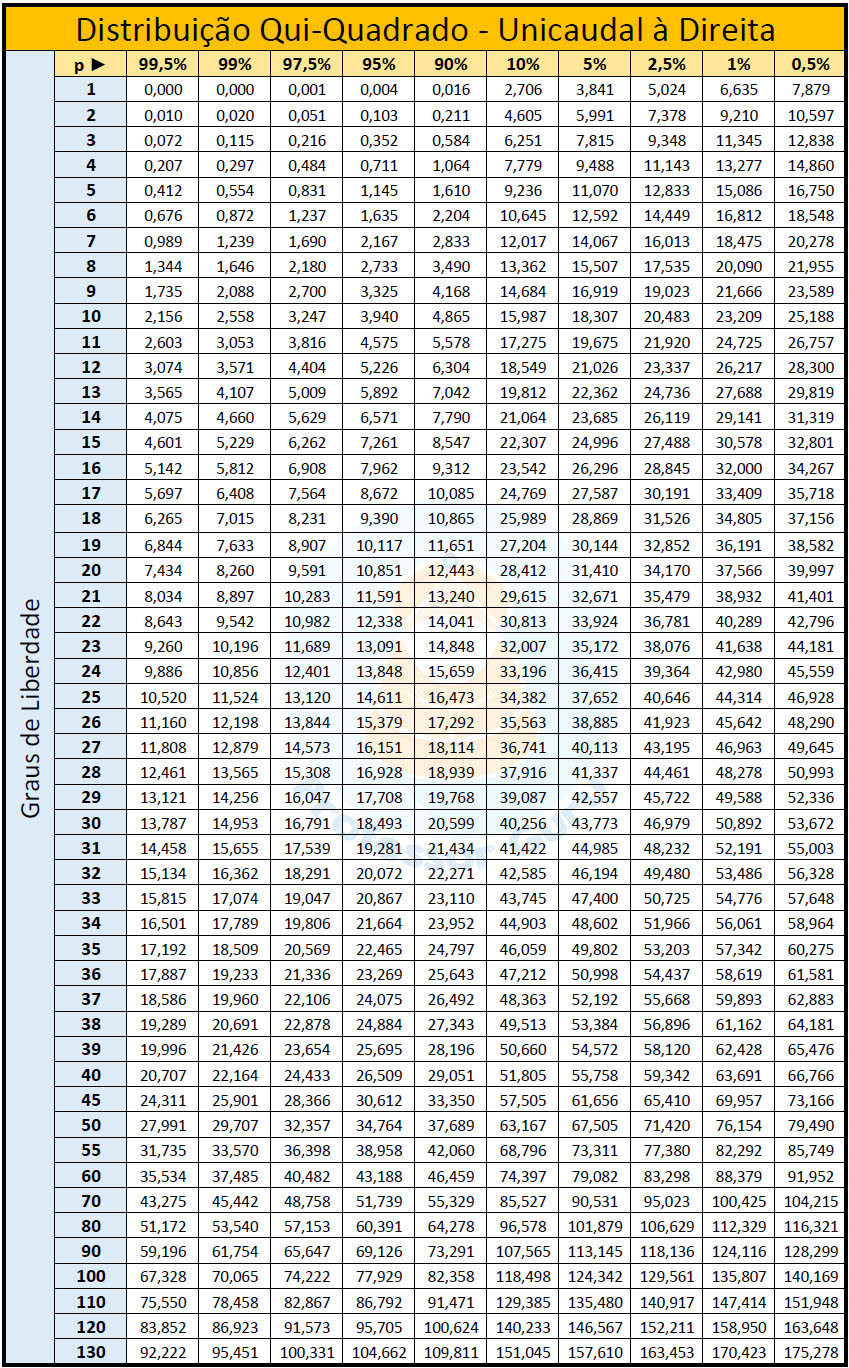